In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,544 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [95]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [96]:
import pandas as pd
import numpy as np

# 데이터 로드

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
%cd /content/drive/MyDrive/코드스테이츠(ai 캠프)/[S2] 머신러닝/data/project_data

/content/drive/MyDrive/코드스테이츠(ai 캠프)/[S2] 머신러닝/data/project_data


In [99]:
df = pd.read_csv('/content/drive/MyDrive/코드스테이츠(ai 캠프)/[S2] 머신러닝/data/project_data/전처리_data/(전처리2).csv', encoding='cp949')
df = df.drop(columns='Unnamed: 0')
df # 과제때 전처리 해두었던 데이터 불러오기

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales
0,2001-01-01,36427,21610,20518,1092,14816,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0
1,2001-02-01,36457,21652,20470,1182,14805,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0
2,2001-03-01,36487,22087,20959,1127,14401,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0
3,2001-04-01,36515,22622,21697,925,13893,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0
4,2001-05-01,36549,22809,21969,840,13740,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021-01-01,44968,27388,25818,1570,17580,60.9,5.7,57.4,25003.0,27181.0,16280.0,8373.0,15069277.0,11140521.0,3928756.0
241,2021-02-01,44987,27718,26365,1353,17269,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0
242,2021-03-01,45007,28138,26923,1215,16869,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0
243,2021-04-01,45027,28361,27214,1147,16667,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0


In [100]:
# csv 파일들을 프린트합니다
from glob import glob
for filename in glob('*.csv'):
    print(filename) # 경로 설정된 해당 폴더 안에 있는 파일 -- 추가적으로 변수 붙여야 할 데이터들 

생산자물가지수.csv
소비자물가지수_2001~2021.csv
(날씨)서울시 기온_2001~2021.csv
(날씨)서울시_월별강수량_2001~2021.csv
(날씨)서울시_월별풍속_2001~2021.csv
(날씨)서울시_월별습도_2001~2021.csv
(날씨)서울시_월별일조량_2001~2021.csv
(비율)월별인구동향_출생_사망_혼인_이혼__20210630014818.csv
인터넷&모바일_2013~2021.csv
종합몰&전문몰_2001~2021.csv
전처리3.csv
전처리4.csv


In [101]:
# 각 파일의 shape, head를 출력하는 함수
from IPython.display import display
import pandas as pd

def preview():
    for filename in glob('*.csv'):
        df = pd.read_csv(filename, encoding='cp949') # , encoding='cp949'
        print(filename, df.shape)
        display(df.head())
        print('\n') # 폴더 안의 7개의 파일 정보 출력

In [102]:
preview()

생산자물가지수.csv (111617, 4)


,계정항목코드별,시점,생산자물가지수(기본분류)(2015=100),Unnamed: 3
0,총지수[2015=100],2001. 01 월,78.68,NaN
1,총지수[2015=100],2001. 02 월,78.52,NaN
2,총지수[2015=100],2001. 03 월,78.70,NaN
3,총지수[2015=100],2001. 04 월,78.65,NaN
4,총지수[2015=100],2001. 05 월,78.58,NaN




소비자물가지수_2001~2021.csv (246, 2)


,시점,0 총지수
0,시점,전국
1,2001. 01,68.103
2,2001. 02,68.435
3,2001. 03,69.035
4,2001. 04,69.301




(날씨)서울시 기온_2001~2021.csv (246, 9)


,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,서울,Jan-01,-4.1,-0.8,6.8,2001-01-25,-7.8,-18.6,2001-01-15
1,서울,Feb-01,-0.3,3.7,12.2,2001-02-22,-3.7,-10.4,2001-02-02
2,서울,Mar-01,5.0,9.6,21.0,2001-03-24,0.9,-6.1,2001-03-08
3,서울,Apr-01,13.6,19.2,28.2,2001-04-09,8.7,2.1,2001-04-03
4,서울,May-01,19.1,24.7,31.5,2001-05-21,14.8,10.4,2001-05-10




(날씨)서울시_월별강수량_2001~2021.csv (252, 8)


,\t지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자
0,\t108,서울,Jan-01,39.4,21.7,2001-01-07,NaN,NaN
1,\t108,서울,Feb-01,45.7,23.2,2001-02-15,NaN,NaN
2,\t108,서울,Mar-01,18.1,11.2,2001-03-03,NaN,NaN
3,\t108,서울,Apr-01,12.3,6.5,2001-04-11,3.5,2001-04-14
4,\t108,서울,May-01,16.5,7.9,2001-05-22,2.4,2001-05-07




(날씨)서울시_월별풍속_2001~2021.csv (250, 11)


,\t\t지점번호,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속일자,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속일자,Unnamed: 10
0,\t\t108,서울,Jan-01,2.2,6.6,230.0,2001-01-29,13.5,270.0,2001-01-28,NaN
1,\t\t108,서울,Feb-01,2.1,6.3,270.0,2001-02-09,11.9,290.0,2001-02-09,NaN
2,\t\t108,서울,Mar-01,2.8,8.9,230.0,2001-03-06,17.6,270.0,2001-03-04,NaN
3,\t\t108,서울,Apr-01,2.5,8.0,230.0,2001-04-14,15.0,230.0,2001-04-12,NaN
4,\t\t108,서울,May-01,2.1,7.2,230.0,2001-05-15,11.2,230.0,2001-05-18,NaN




(날씨)서울시_월별습도_2001~2021.csv (249, 5)


,\t\t지점번호,지점명,일시,평균습도(%rh),최저습도(%rh)
0,\t\t108,서울,Jan-01,62.0,36.0
1,\t\t108,서울,Feb-01,60.0,15.0
2,\t\t108,서울,Mar-01,51.0,9.0
3,\t\t108,서울,Apr-01,50.0,11.0
4,\t\t108,서울,May-01,61.0,16.0




(날씨)서울시_월별일조량_2001~2021.csv (248, 6)


,\t\t지점번호,지점명,일시,일조합,일조율,일사합
0,\t\t108,서울,Jan-01,97.0,31.58,205.80
1,\t\t108,서울,Feb-01,117.0,38.69,256.31
2,\t\t108,서울,Mar-01,151.0,40.80,396.53
3,\t\t108,서울,Apr-01,177.8,45.37,492.04
4,\t\t108,서울,May-01,163.1,37.34,504.43




(비율)월별인구동향_출생_사망_혼인_이혼__20210630014818.csv (245, 5)


,시점,전국,전국.1,전국.2,전국.3
0,시점,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당)
1,2001. 01,14.0,5.2,6.7,2.3
2,2001. 02,13.6,5.4,6.6,3.1
3,2001. 03,13.4,5.5,6.9,3.0
4,2001. 04,12.3,5.3,7.4,2.8




인터넷&모바일_2013~2021.csv (101, 3)


,시점,합계,합계.1
0,시점,인터넷쇼핑,모바일쇼핑
1,2013. 01,2815624,373409
2,2013. 02,2405536,347288
3,2013. 03,2626963,406712
4,2013. 04,2606326,408436




종합몰&전문몰_2001~2021.csv (244, 3)


,시점,종합몰,전문몰
0,2001. 01,155977,73010
1,2001. 02,158313,78705
2,2001. 03,153303,88478
3,2001. 04,163976,88455
4,2001. 05,189998,89614




전처리3.csv (246, 38)


,Unnamed: 0,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑_x,모바일쇼핑_x,인터넷쇼핑_y,모바일쇼핑_y
0,0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN,NaN,NaN
1,1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN,NaN,NaN
2,2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN,NaN,NaN
3,3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN,NaN,NaN
4,4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN,NaN,NaN




전처리4.csv (246, 36)


,Unnamed: 0,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑,모바일쇼핑
0,0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN
1,1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN
2,2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN
3,3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN
4,4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN


#  Data Manipulation 

In [103]:
# 특성으로 들어갈 날씨와 비율로 된 인구동향, 생산자/소비자 물가지수 등의 데이터를 불러오자

# 물가지수
df1 = pd.read_csv('생산자물가지수.csv', encoding='cp949')
df2 = pd.read_csv('소비자물가지수_2001~2021.csv', encoding='cp949')

# 날씨 
df3 = pd.read_csv('(날씨)서울시 기온_2001~2021.csv', encoding='cp949')
df4 = pd.read_csv('(날씨)서울시_월별강수량_2001~2021.csv', encoding='cp949')
df5 = pd.read_csv('(날씨)서울시_월별풍속_2001~2021.csv', encoding='cp949')
df6 = pd.read_csv('(날씨)서울시_월별습도_2001~2021.csv', encoding='cp949')
df7 = pd.read_csv('(날씨)서울시_월별일조량_2001~2021.csv', encoding='cp949')

# 비율로된 월별인구동향
df8 = pd.read_csv('(비율)월별인구동향_출생_사망_혼인_이혼__20210630014818.csv', encoding='cp949')

# 취급상품범위별
df9 = pd.read_csv('종합몰&전문몰_2001~2021.csv', encoding='cp949')

# 판매매체별
df10 = pd.read_csv('인터넷&모바일_2013~2021.csv', encoding='cp949')

In [104]:
df1 # 항목이 계정항목코드별 변수에서 여러개로 20개년치가 들어있어 111617개이다. 

,계정항목코드별,시점,생산자물가지수(기본분류)(2015=100),Unnamed: 3
0,총지수[2015=100],2001. 01 월,78.68,NaN
1,총지수[2015=100],2001. 02 월,78.52,NaN
2,총지수[2015=100],2001. 03 월,78.70,NaN
3,총지수[2015=100],2001. 04 월,78.65,NaN
4,총지수[2015=100],2001. 05 월,78.58,NaN
...,...,...,...,...
111612,기타개인서비스[2015=100],2021. 01 월,116.96,NaN
111613,기타개인서비스[2015=100],2021. 02 월,117.45,NaN
111614,기타개인서비스[2015=100],2021. 03 월,117.79,NaN
111615,기타개인서비스[2015=100],2021. 04 월,117.92,NaN


In [105]:
df1 = df1[df1['계정항목코드별'] == '총지수[2015=100]'] # 총지수를 조건으로 가져옴
df1

,계정항목코드별,시점,생산자물가지수(기본분류)(2015=100),Unnamed: 3
0,총지수[2015=100],2001. 01 월,78.68,NaN
1,총지수[2015=100],2001. 02 월,78.52,NaN
2,총지수[2015=100],2001. 03 월,78.70,NaN
3,총지수[2015=100],2001. 04 월,78.65,NaN
4,총지수[2015=100],2001. 05 월,78.58,NaN
...,...,...,...,...
240,총지수[2015=100],2021. 01 월,105.05,NaN
241,총지수[2015=100],2021. 02 월,105.91,NaN
242,총지수[2015=100],2021. 03 월,107.04,NaN
243,총지수[2015=100],2021. 04 월,108.06,NaN


In [106]:
# 필요없는 행 제거 및 컬럼명 재설정
df1 = df1.iloc[:,[1,2]]
df1.columns = ['Date', 'PPI'] # 생산자물가지수 = PPI
df1

,Date,PPI
0,2001. 01 월,78.68
1,2001. 02 월,78.52
2,2001. 03 월,78.70
3,2001. 04 월,78.65
4,2001. 05 월,78.58
...,...,...
240,2021. 01 월,105.05
241,2021. 02 월,105.91
242,2021. 03 월,107.04
243,2021. 04 월,108.06


In [107]:
# 붙이기
df = pd.concat([df,df1['PPI']], axis=1 )
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI
0,2001-01-01,36427,21610,20518,1092,14816,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68
1,2001-02-01,36457,21652,20470,1182,14805,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52
2,2001-03-01,36487,22087,20959,1127,14401,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70
3,2001-04-01,36515,22622,21697,925,13893,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65
4,2001-05-01,36549,22809,21969,840,13740,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021-01-01,44968,27388,25818,1570,17580,60.9,5.7,57.4,25003.0,27181.0,16280.0,8373.0,15069277.0,11140521.0,3928756.0,105.05
241,2021-02-01,44987,27718,26365,1353,17269,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91
242,2021-03-01,45007,28138,26923,1215,16869,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04
243,2021-04-01,45027,28361,27214,1147,16667,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06


In [108]:
# 소비자물가지수
df2 = df2.iloc[1:,:]
df2.columns = ['Date','CPI'] # 소비자물가지수 = CPI

In [109]:
df2 = df2.reset_index().iloc[:,1:] # 인덱스 0부터 시작하게 재정렬
df2

,Date,CPI
0,2001. 01,68.103
1,2001. 02,68.435
2,2001. 03,69.035
3,2001. 04,69.301
4,2001. 05,69.234
...,...,...
240,2021. 01,106.47
241,2021. 02,107.00
242,2021. 03,107.16
243,2021. 04,107.39


In [110]:
# 붙이기
df = pd.concat([df, df2['CPI']], axis=1)
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI
0,2001-01-01,36427,21610,20518,1092,14816,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103
1,2001-02-01,36457,21652,20470,1182,14805,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435
2,2001-03-01,36487,22087,20959,1127,14401,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035
3,2001-04-01,36515,22622,21697,925,13893,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301
4,2001-05-01,36549,22809,21969,840,13740,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021-01-01,44968,27388,25818,1570,17580,60.9,5.7,57.4,25003.0,27181.0,16280.0,8373.0,15069277.0,11140521.0,3928756.0,105.05,106.47
241,2021-02-01,44987,27718,26365,1353,17269,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00
242,2021-03-01,45007,28138,26923,1215,16869,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16
243,2021-04-01,45027,28361,27214,1147,16667,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39


In [111]:
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI
0,2001-01-01,36427,21610,20518,1092,14816,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103
1,2001-02-01,36457,21652,20470,1182,14805,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435
2,2001-03-01,36487,22087,20959,1127,14401,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035
3,2001-04-01,36515,22622,21697,925,13893,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301
4,2001-05-01,36549,22809,21969,840,13740,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021-01-01,44968,27388,25818,1570,17580,60.9,5.7,57.4,25003.0,27181.0,16280.0,8373.0,15069277.0,11140521.0,3928756.0,105.05,106.47
241,2021-02-01,44987,27718,26365,1353,17269,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00
242,2021-03-01,45007,28138,26923,1215,16869,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16
243,2021-04-01,45027,28361,27214,1147,16667,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39


날씨 데이터 붙이기

In [112]:
# 기온
df3

,지점명,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),\t최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
0,서울,Jan-01,-4.1,-0.8,6.8,2001-01-25,-7.8,-18.6,2001-01-15
1,서울,Feb-01,-0.3,3.7,12.2,2001-02-22,-3.7,-10.4,2001-02-02
2,서울,Mar-01,5.0,9.6,21.0,2001-03-24,0.9,-6.1,2001-03-08
3,서울,Apr-01,13.6,19.2,28.2,2001-04-09,8.7,2.1,2001-04-03
4,서울,May-01,19.1,24.7,31.5,2001-05-21,14.8,10.4,2001-05-10
...,...,...,...,...,...,...,...,...,...
241,서울,Feb-21,2.7,7.9,17.4,2021-02-21,-2.2,-10.6,2021-02-18
242,서울,Mar-21,9.0,14.8,22.9,2021-03-31,4.3,-1.2,2021-03-03
243,서울,Apr-21,14.2,19.5,28.2,2021-04-21,9.5,3.1,2021-04-14
244,서울,May-21,17.1,21.9,30.8,2021-05-14,12.8,7.3,2021-05-02


In [113]:
df = pd.concat([df,df3[['평균기온(℃)','평균최고기온(℃)','최고기온(℃)','평균최저기온(℃)','최저기온(℃)']] ], axis=1)
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃)
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3


In [114]:
# 강수량 
df4 = df4.iloc[:246,:]
df4

,\t지점번호,지점명,일시,강수량(mm),일최다강수량(mm),일최다강수량일자,1시간최다강수량(mm),1시간최다강수량일자
0,\t108,서울,Jan-01,39.4,21.7,2001-01-07,NaN,NaN
1,\t108,서울,Feb-01,45.7,23.2,2001-02-15,NaN,NaN
2,\t108,서울,Mar-01,18.1,11.2,2001-03-03,NaN,NaN
3,\t108,서울,Apr-01,12.3,6.5,2001-04-11,3.5,2001-04-14
4,\t108,서울,May-01,16.5,7.9,2001-05-22,2.4,2001-05-07
...,...,...,...,...,...,...,...,...
241,\t108,서울,Feb-21,7.1,3.4,2021-02-03,NaN,NaN
242,\t108,서울,Mar-21,110.9,67.5,2021-03-01,NaN,NaN
243,\t108,서울,Apr-21,124.1,56.2,2021-04-03,11.5,2021-04-03
244,\t108,서울,May-21,183.1,66.9,2021-05-16,11.3,2021-05-30


In [115]:
df = pd.concat([df, df4['강수량(mm)']], axis=1)
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm)
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1


In [116]:
# 풍속
df5 = df5.iloc[:246,:]
df5

,\t\t지점번호,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속일자,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속일자,Unnamed: 10
0,\t\t108,서울,Jan-01,2.2,6.6,230.0,2001-01-29,13.5,270.0,2001-01-28,NaN
1,\t\t108,서울,Feb-01,2.1,6.3,270.0,2001-02-09,11.9,290.0,2001-02-09,NaN
2,\t\t108,서울,Mar-01,2.8,8.9,230.0,2001-03-06,17.6,270.0,2001-03-04,NaN
3,\t\t108,서울,Apr-01,2.5,8.0,230.0,2001-04-14,15.0,230.0,2001-04-12,NaN
4,\t\t108,서울,May-01,2.1,7.2,230.0,2001-05-15,11.2,230.0,2001-05-18,NaN
...,...,...,...,...,...,...,...,...,...,...,...
241,\t\t108,서울,Feb-21,2.6,7.5,270.0,2021-02-17,15.8,270.0,2021-02-17,NaN
242,\t\t108,서울,Mar-21,2.4,6.9,230.0,2021-03-22,14.8,320.0,2021-03-21,NaN
243,\t\t108,서울,Apr-21,2.6,7.1,290.0,2021-04-17,12.5,180.0,2021-04-17,NaN
244,\t\t108,서울,May-21,2.4,8.4,200.0,2021-05-08,16.0,270.0,2021-05-30,NaN


In [117]:
df = pd.concat([df, df5['평균풍속(m/s)'] ], axis=1)
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s)
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9,2.4
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1,2.6
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1,2.4


In [118]:
# 습도
df6 = df6.iloc[:246,:]
df6

,\t\t지점번호,지점명,일시,평균습도(%rh),최저습도(%rh)
0,\t\t108,서울,Jan-01,62.0,36.0
1,\t\t108,서울,Feb-01,60.0,15.0
2,\t\t108,서울,Mar-01,51.0,9.0
3,\t\t108,서울,Apr-01,50.0,11.0
4,\t\t108,서울,May-01,61.0,16.0
...,...,...,...,...,...
241,\t\t108,서울,Feb-21,56.0,18.0
242,\t\t108,서울,Mar-21,63.0,19.0
243,\t\t108,서울,Apr-21,54.0,18.0
244,\t\t108,서울,May-21,68.0,25.0


In [119]:
df = pd.concat([df, df6['평균습도(%rh)']], axis=1)
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh)
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0


In [120]:
# 일조량
df7 = df7.iloc[:246, :]
df7

,\t\t지점번호,지점명,일시,일조합,일조율,일사합
0,\t\t108,서울,Jan-01,97.0,31.58,205.80
1,\t\t108,서울,Feb-01,117.0,38.69,256.31
2,\t\t108,서울,Mar-01,151.0,40.80,396.53
3,\t\t108,서울,Apr-01,177.8,45.37,492.04
4,\t\t108,서울,May-01,163.1,37.34,504.43
...,...,...,...,...,...,...
241,\t\t108,서울,Feb-21,181.0,59.74,348.55
242,\t\t108,서울,Mar-21,213.0,57.37,476.94
243,\t\t108,서울,Apr-21,208.6,52.74,558.28
244,\t\t108,서울,May-21,203.7,46.25,570.50


In [121]:
df = pd.concat([df, df7['일조합']], axis=1)
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7


비율로 환산된 월별 인구동향(출생률, 사망률, 혼인률, 이혼률) 추가하기

In [122]:
df8.columns = df8.iloc[0]

In [123]:
df8 = df8.iloc[1:,:]

In [124]:
df8 =  df8.reset_index()

In [125]:
df8 = df8.iloc[:,1:]
df8 

,시점,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당)
0,2001. 01,14.0,5.2,6.7,2.3
1,2001. 02,13.6,5.4,6.6,3.1
2,2001. 03,13.4,5.5,6.9,3.0
3,2001. 04,12.3,5.3,7.4,2.8
4,2001. 05,11.5,5.0,8.3,2.9
...,...,...,...,...,...
239,2020. 12 p),4.5,6.2,5.1,2.1
240,2021. 01 p),5.7,6.2,3.7,1.9
241,2021. 02 p),5.4,6.0,3.8,2.0
242,2021. 03 p),5.5,6.1,3.8,2.1


In [126]:
df = pd.concat([df, df8[['조출생률(천명당)','조사망률(천명당)','조혼인율(천명당)','조이혼율(천명당)']]], axis=1)
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당)
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,NaN,NaN,NaN,NaN


 취급상품 범위별 거래액

In [127]:
df9 #0~243 index

,시점,종합몰,전문몰
0,2001. 01,155977,73010
1,2001. 02,158313,78705
2,2001. 03,153303,88478
3,2001. 04,163976,88455
4,2001. 05,189998,89614
...,...,...,...
239,2020. 12,10600147,5291055
240,2021. 01,10164968,4904309
241,2021. 02,9305717,4610087
242,2021. 03,10455604,5493364


In [128]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      244 non-null    object
 1   종합몰     244 non-null    int64 
 2   전문몰     244 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.8+ KB


In [129]:
# 취급상품 범위별 거래액 데이터 추가
df = pd.concat([df, df9[['종합몰','전문몰']]], axis=1) 
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,NaN,NaN,NaN,NaN,NaN,NaN


판매매체별 거래액

In [130]:
df10

,시점,합계,합계.1
0,시점,인터넷쇼핑,모바일쇼핑
1,2013. 01,2815624,373409
2,2013. 02,2405536,347288
3,2013. 03,2626963,406712
4,2013. 04,2606326,408436
...,...,...,...
96,2020. 12,4817459,11073743
97,2021. 01,4467809,10601468
98,2021. 02,3991806,9923997
99,2021. 03,4889892,11059075


In [131]:
df10.columns =df10.iloc[0]

In [132]:
df10 = df10.iloc[1:]
df10 # 판매매체별 데이터는 2001부터 시작하지 않아서 concat으로 붙일 수 없다. 
# 시점을 on으로 두고 merge를 해보자. 
# 시점을 df의 시점과 똑같이 만들어야한다. 

,시점,인터넷쇼핑,모바일쇼핑
1,2013. 01,2815624,373409
2,2013. 02,2405536,347288
3,2013. 03,2626963,406712
4,2013. 04,2606326,408436
5,2013. 05,2718382,452237
...,...,...,...
96,2020. 12,4817459,11073743
97,2021. 01,4467809,10601468
98,2021. 02,3991806,9923997
99,2021. 03,4889892,11059075


날짜 데이터 전처리

In [133]:
# 6월 Date 추가 
df.iloc[245,0]  = '2021-06-01'
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
df10['시점'] = pd.to_datetime(df10['시점'])
df10['시점']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1     2013-01-01
2     2013-02-01
3     2013-03-01
4     2013-04-01
5     2013-05-01
         ...    
96    2020-12-01
97    2021-01-01
98    2021-02-01
99    2021-03-01
100   2021-04-01
Name: 시점, Length: 100, dtype: datetime64[ns]

In [135]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] 

0     2001-01-01
1     2001-02-01
2     2001-03-01
3     2001-04-01
4     2001-05-01
         ...    
241   2021-02-01
242   2021-03-01
243   2021-04-01
244   2021-05-01
245   2021-06-01
Name: Date, Length: 246, dtype: datetime64[ns]

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           246 non-null    datetime64[ns]
 1   15세이상인구 (천명)   245 non-null    float64       
 2   경제활동인구 (천명)    245 non-null    float64       
 3   취업자 (천명)       245 non-null    float64       
 4   실업자 (천명)       245 non-null    float64       
 5   비경제활동인구 (천명)   245 non-null    float64       
 6   경제활동참가율 (%)    245 non-null    float64       
 7   실업률 (%)        245 non-null    float64       
 8   고용률 (%)        245 non-null    float64       
 9   출생아수(명)        244 non-null    float64       
 10  사망자수(명)        244 non-null    float64       
 11  혼인건수(건)        244 non-null    float64       
 12  이혼건수(건)        244 non-null    float64       
 13  Total_sales    244 non-null    float64       
 14  Online_sales   244 non-null    float64       
 15  Offline_sales  244 non-

In [137]:
df10.info() # 둘다 데이트타임으로 변환됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 1 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시점      100 non-null    datetime64[ns]
 1   인터넷쇼핑   100 non-null    object        
 2   모바일쇼핑   100 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.5+ KB


In [138]:
df10.columns = ['Date', '인터넷쇼핑', '모바일쇼핑']

In [139]:
# 판매매체별 거래액 컬럼으로 추가하기
df =pd.merge(df, df10, how ='left', on= 'Date') 
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑,모바일쇼핑
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0,3991806,9923997
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0,4889892,11059075
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099,10730346
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# 저장
# df.to_csv('전처리4.csv', encoding='cp949') # 저장 후 데이터가 잘 전처리 되었음을 엑셀로 확인

# 전처리

In [141]:
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑,모바일쇼핑
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0,3991806,9923997
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0,4889892,11059075
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099,10730346
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


새로운 변수(df10)를 추가하며 이미 날짜데이터를 전처리하여서 주석처리

In [142]:
# df.iloc[244,0]

In [143]:
# df.iloc[245,0] # 6월 날짜가 널값임

In [144]:
# df.iloc[245,0]  = '2021-06-01'
# df

In [145]:
# from datetime import datetime

# df['Date']= df['Date'].astype('str')
# df['Date'] = df['Date'].apply(lambda _ : datetime.strptime(_,'%Y-%m-%d'))

object데이터 전처리

In [147]:
# object데이터 -> float 변환

df['CPI'] = df['CPI'].astype(float)
df['조사망률(천명당)'] = df['조사망률(천명당)'].astype(float)
df['조이혼율(천명당)'] = df['조이혼율(천명당)'].astype(float)
df['조출생률(천명당)'] = df['조출생률(천명당)'].astype(float)
df['조혼인율(천명당)'] = df['조혼인율(천명당)'].astype(float)

df['종합몰'] = df['종합몰'].astype(float)
df['전문몰'] = df['전문몰'].astype(float)
df['인터넷쇼핑'] = df['인터넷쇼핑'].astype(float)
df['모바일쇼핑'] = df['모바일쇼핑'].astype(float)

In [148]:
df.info() # 날짜를 제외하고 모두 실수형

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           246 non-null    datetime64[ns]
 1   15세이상인구 (천명)   245 non-null    float64       
 2   경제활동인구 (천명)    245 non-null    float64       
 3   취업자 (천명)       245 non-null    float64       
 4   실업자 (천명)       245 non-null    float64       
 5   비경제활동인구 (천명)   245 non-null    float64       
 6   경제활동참가율 (%)    245 non-null    float64       
 7   실업률 (%)        245 non-null    float64       
 8   고용률 (%)        245 non-null    float64       
 9   출생아수(명)        244 non-null    float64       
 10  사망자수(명)        244 non-null    float64       
 11  혼인건수(건)        244 non-null    float64       
 12  이혼건수(건)        244 non-null    float64       
 13  Total_sales    244 non-null    float64       
 14  Online_sales   244 non-null    float64       
 15  Offline_sales  244 non-

결측치 처리

In [149]:
df.isna().sum()

Date               0
15세이상인구 (천명)       1
경제활동인구 (천명)        1
취업자 (천명)           1
실업자 (천명)           1
비경제활동인구 (천명)       1
경제활동참가율 (%)        1
실업률 (%)            1
고용률 (%)            1
출생아수(명)            2
사망자수(명)            2
혼인건수(건)            2
이혼건수(건)            2
Total_sales        2
Online_sales       2
Offline_sales      2
PPI                1
CPI                1
평균기온(℃)            0
평균최고기온(℃)          0
최고기온(℃)            0
평균최저기온(℃)          0
최저기온(℃)            0
강수량(mm)            0
평균풍속(m/s)          0
평균습도(%rh)          0
일조합                0
조출생률(천명당)          2
조사망률(천명당)          2
조혼인율(천명당)          2
조이혼율(천명당)          2
종합몰                2
전문몰                2
인터넷쇼핑            146
모바일쇼핑            146
dtype: int64

In [150]:
# 시계열데이터이므로 전달의 데이터가 가장 이번달의 수치와 비슷할 것으로 가정하고 이 값으로 결측치를 채웠다.
df = df.fillna(method='ffill')
df2 = df2.fillna(method='ffill')
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,Online_sales,Offline_sales,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑,모바일쇼핑
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.000,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0,3991806.0,9923997.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.160,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0,4889892.0,11059075.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.390,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.50,107.460,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0


In [151]:
df.isna().sum() # 전달의 데이터가 없는 모바일과 인터넷쇼핑은 결측치가 여전히 있음. --> 스마트폰이 발전하기 전인 2001년~2012년의 데이터이므로 이를 발전한 시대의 거래액으로 채우는 것은 아닌 것 같다. 
# 시각화 등으로 볼 때 비워두고 보는 것이 더 시대를 잘 반영하는 것으로 느껴지지만 널값으로 에러가 나면 0으로 대체할 것.

Date               0
15세이상인구 (천명)       0
경제활동인구 (천명)        0
취업자 (천명)           0
실업자 (천명)           0
비경제활동인구 (천명)       0
경제활동참가율 (%)        0
실업률 (%)            0
고용률 (%)            0
출생아수(명)            0
사망자수(명)            0
혼인건수(건)            0
이혼건수(건)            0
Total_sales        0
Online_sales       0
Offline_sales      0
PPI                0
CPI                0
평균기온(℃)            0
평균최고기온(℃)          0
최고기온(℃)            0
평균최저기온(℃)          0
최저기온(℃)            0
강수량(mm)            0
평균풍속(m/s)          0
평균습도(%rh)          0
일조합                0
조출생률(천명당)          0
조사망률(천명당)          0
조혼인율(천명당)          0
조이혼율(천명당)          0
종합몰                0
전문몰                0
인터넷쇼핑            144
모바일쇼핑            144
dtype: int64

In [313]:
df2[['인터넷쇼핑','모바일쇼핑']][df2['Date'] == '2013-01-01'] # 2815624.0	373409.0

,인터넷쇼핑,모바일쇼핑
144,2815624.0,373409.0


to_period로 변환시 보기엔 이쁘지만 시각화가 안되어서 주석처리

In [152]:
#  Date를 월까지만 표기
# df['Date'] = df['Date'].dt.to_period(freq = 'M')
# df

운영형태별 매출액을 tidy데이터로 변환
> 'Online_sales','Offline_sales' 두개의 컬럼으로 들어가 있던 운영형태별 매출액을 운영형태 변수와 매출액으로 tidy형태로 변환

In [153]:
df.rename(columns = {'Online_sales' : '온라인', 'Offline_sales':'온오프라인'}, inplace = True)

In [154]:
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,온라인,온오프라인,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑,모바일쇼핑
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.000,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0,3991806.0,9923997.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.160,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0,4889892.0,11059075.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.390,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.50,107.460,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0


In [156]:
# 2001-01월의 종합몰과 전문몰의 합산거래액과 온라인과 온오프라인의 합산거래액인 Total_sales가 같은 것으로 보아 Total_sales을 총 거래액의 변수로 사용가능하다. 

155977.0 +	73010.0

228987.0

Total_sales을 제외한 나머지 온오프라인 / 종합,전문 / 인쇼,모바일 거래액을 tidy형태로 만들자

In [155]:
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,온라인,온오프라인,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑,모바일쇼핑
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.000,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0,3991806.0,9923997.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.160,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0,4889892.0,11059075.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.390,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.50,107.460,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0


In [157]:
var = df.drop(columns=['온라인','온오프라인','종합몰','전문몰','인터넷쇼핑','모바일쇼핑']).columns
var

Index(['Date', '15세이상인구 (천명)', '경제활동인구 (천명)', '취업자 (천명)', '실업자 (천명)',
       '비경제활동인구 (천명)', '경제활동참가율 (%)', '실업률 (%)', '고용률 (%)', '출생아수(명)',
       '사망자수(명)', '혼인건수(건)', '이혼건수(건)', 'Total_sales', 'PPI', 'CPI', '평균기온(℃)',
       '평균최고기온(℃)', '최고기온(℃)', '평균최저기온(℃)', '최저기온(℃)', '강수량(mm)', '평균풍속(m/s)',
       '평균습도(%rh)', '일조합', '조출생률(천명당)', '조사망률(천명당)', '조혼인율(천명당)', '조이혼율(천명당)'],
      dtype='object')

In [158]:
var = ['Date', '15세이상인구 (천명)', '경제활동인구 (천명)', '취업자 (천명)', '실업자 (천명)',
       '비경제활동인구 (천명)', '경제활동참가율 (%)', '실업률 (%)', '고용률 (%)', 'PPI', 'CPI', '평균기온(℃)',
       '평균최고기온(℃)', '최고기온(℃)', '평균최저기온(℃)', '최저기온(℃)', '강수량(mm)', '평균풍속(m/s)',
       '평균습도(%rh)', '일조합', '조출생률(천명당)', '조사망률(천명당)', '조혼인율(천명당)', '조이혼율(천명당)','Total_sales']

In [159]:
246*6 # 예상 데이터 개수

1476

In [160]:
df2 = df.copy() # 변환 전 기존의 데이터 카피해둠

In [161]:
df = df.melt(id_vars=var , value_vars=['온라인','온오프라인','종합몰','전문몰','인터넷쇼핑','모바일쇼핑'], var_name='쇼핑몰운영형태', value_name='거래액')
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),Total_sales,쇼핑몰운영형태,거래액
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,228987.0,온라인,84119.0
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,237018.0,온라인,96514.0
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,241781.0,온라인,98403.0
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,252430.0,온라인,106259.0
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,279612.0,온라인,117766.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,105.91,107.000,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,13915804.0,모바일쇼핑,9923997.0
1472,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,107.04,107.160,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,15948968.0,모바일쇼핑,11059075.0
1473,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,108.06,107.390,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,15090445.0,모바일쇼핑,10730346.0
1474,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,108.50,107.460,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,5.4,5.9,3.8,2.1,15090445.0,모바일쇼핑,10730346.0


In [162]:
df.info() # 운영형태는 범주형으로 추가되었다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1476 non-null   datetime64[ns]
 1   15세이상인구 (천명)  1476 non-null   float64       
 2   경제활동인구 (천명)   1476 non-null   float64       
 3   취업자 (천명)      1476 non-null   float64       
 4   실업자 (천명)      1476 non-null   float64       
 5   비경제활동인구 (천명)  1476 non-null   float64       
 6   경제활동참가율 (%)   1476 non-null   float64       
 7   실업률 (%)       1476 non-null   float64       
 8   고용률 (%)       1476 non-null   float64       
 9   PPI           1476 non-null   float64       
 10  CPI           1476 non-null   float64       
 11  평균기온(℃)       1476 non-null   float64       
 12  평균최고기온(℃)     1476 non-null   float64       
 13  최고기온(℃)       1476 non-null   float64       
 14  평균최저기온(℃)     1476 non-null   float64       
 15  최저기온(℃)       1476 non-null   float64 

In [163]:
pd.Series(df['쇼핑몰운영형태'].unique())

0      온라인
1    온오프라인
2      종합몰
3      전문몰
4    인터넷쇼핑
5    모바일쇼핑
dtype: object

In [164]:
df.shape # 운영형태별로 tidy형태로 만들어서 데이터의 갯수가 들어남

(1476, 27)

특성추가

In [165]:
# 월 변수 생성 
df['Month']=df['Date'].dt.month #- 월별로 매출액에 추세가 있는지 확인 가능

In [166]:
Month=pd.Series(df['Month'].unique())
Month

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
dtype: int64

In [167]:
# 연도 변수 생성
df['Year']=df['Date'].dt.year

In [168]:
Year=pd.Series(df['Year'].unique())
Year

0     2001
1     2002
2     2003
3     2004
4     2005
5     2006
6     2007
7     2008
8     2009
9     2010
10    2011
11    2012
12    2013
13    2014
14    2015
15    2016
16    2017
17    2018
18    2019
19    2020
20    2021
dtype: int64

In [169]:
df

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),Total_sales,쇼핑몰운영형태,거래액,Month,Year
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,228987.0,온라인,84119.0,1,2001
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,237018.0,온라인,96514.0,2,2001
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,241781.0,온라인,98403.0,3,2001
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,252430.0,온라인,106259.0,4,2001
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,279612.0,온라인,117766.0,5,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,105.91,107.000,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,13915804.0,모바일쇼핑,9923997.0,2,2021
1472,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,107.04,107.160,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,15948968.0,모바일쇼핑,11059075.0,3,2021
1473,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,108.06,107.390,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,15090445.0,모바일쇼핑,10730346.0,4,2021
1474,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,108.50,107.460,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,5.4,5.9,3.8,2.1,15090445.0,모바일쇼핑,10730346.0,5,2021


결측치 처리 

In [170]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246 entries, 0 to 245
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          246 non-null    datetime64[ns]
 1   15세이상인구 (천명)  246 non-null    float64       
 2   경제활동인구 (천명)   246 non-null    float64       
 3   취업자 (천명)      246 non-null    float64       
 4   실업자 (천명)      246 non-null    float64       
 5   비경제활동인구 (천명)  246 non-null    float64       
 6   경제활동참가율 (%)   246 non-null    float64       
 7   실업률 (%)       246 non-null    float64       
 8   고용률 (%)       246 non-null    float64       
 9   출생아수(명)       246 non-null    float64       
 10  사망자수(명)       246 non-null    float64       
 11  혼인건수(건)       246 non-null    float64       
 12  이혼건수(건)       246 non-null    float64       
 13  Total_sales   246 non-null    float64       
 14  온라인           246 non-null    float64       
 15  온오프라인         246 non-null    float64   

In [171]:
df2.isna().sum()

Date              0
15세이상인구 (천명)      0
경제활동인구 (천명)       0
취업자 (천명)          0
실업자 (천명)          0
비경제활동인구 (천명)      0
경제활동참가율 (%)       0
실업률 (%)           0
고용률 (%)           0
출생아수(명)           0
사망자수(명)           0
혼인건수(건)           0
이혼건수(건)           0
Total_sales       0
온라인               0
온오프라인             0
PPI               0
CPI               0
평균기온(℃)           0
평균최고기온(℃)         0
최고기온(℃)           0
평균최저기온(℃)         0
최저기온(℃)           0
강수량(mm)           0
평균풍속(m/s)         0
평균습도(%rh)         0
일조합               0
조출생률(천명당)         0
조사망률(천명당)         0
조혼인율(천명당)         0
조이혼율(천명당)         0
종합몰               0
전문몰               0
인터넷쇼핑           144
모바일쇼핑           144
dtype: int64

In [172]:
# # 시계열데이터이므로 전달의 데이터가 가장 이번달의 수치와 비슷할 것으로 가정하고 이 값으로 결측치를 채웠다.
# df = df.fillna(method='ffill') # 타이디데이터는 앞서 결측치 처리함

# 시각화하기 위한 와이드 데이터 전처리
df2 = df2.fillna(method='ffill')
df2

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,온라인,온오프라인,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑,모바일쇼핑
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.000,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0,3991806.0,9923997.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.160,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0,4889892.0,11059075.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.390,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.50,107.460,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0


In [173]:
df.isna().sum().sum(), df2.isna().sum().sum()

(288, 288)

# 시각화

In [174]:
# pd.plotting.register_matplotlib_converters()

In [175]:
df2.columns

Index(['Date', '15세이상인구 (천명)', '경제활동인구 (천명)', '취업자 (천명)', '실업자 (천명)',
       '비경제활동인구 (천명)', '경제활동참가율 (%)', '실업률 (%)', '고용률 (%)', '출생아수(명)',
       '사망자수(명)', '혼인건수(건)', '이혼건수(건)', 'Total_sales', '온라인', '온오프라인', 'PPI',
       'CPI', '평균기온(℃)', '평균최고기온(℃)', '최고기온(℃)', '평균최저기온(℃)', '최저기온(℃)',
       '강수량(mm)', '평균풍속(m/s)', '평균습도(%rh)', '일조합', '조출생률(천명당)', '조사망률(천명당)',
       '조혼인율(천명당)', '조이혼율(천명당)', '종합몰', '전문몰', '인터넷쇼핑', '모바일쇼핑'],
      dtype='object')

In [176]:
# df2  = df2.set_index('Date')

In [177]:
df2

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,온라인,온오프라인,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑,모바일쇼핑
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.000,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0,3991806.0,9923997.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.160,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0,4889892.0,11059075.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.390,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.50,107.460,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0


No handles with labels found to put in legend.


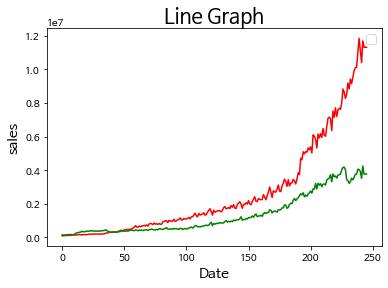

In [179]:
plt.plot(df2.index, df2.온라인,  color='r')

plt.plot(df2.index, df2.온오프라인, color='g')

plt.title('Line Graph', fontsize=20) 

plt.ylabel('sales', fontsize=14)

plt.xlabel('Date', fontsize=14)

plt.legend(fontsize=12, loc='best')

plt.show()



In [180]:
df3 = pd.DataFrame(df2[['Date','온라인','온오프라인','전문몰','종합몰','인터넷쇼핑','모바일쇼핑']])

In [205]:
df4 = pd.DataFrame(df2[['Date','온라인','온오프라인']])
df5 = pd.DataFrame(df2[['Date','전문몰','종합몰']])
df6 = pd.DataFrame(df2[['Date','인터넷쇼핑','모바일쇼핑']])


In [181]:
from datetime import datetime

df3['Date']= df3['Date'].astype('str')
df3['Date'] = df3['Date'].apply(lambda _ : datetime.strptime(_,'%Y-%m-%d'))

In [182]:
df3

,Date,온라인,온오프라인,전문몰,종합몰,인터넷쇼핑,모바일쇼핑
0,2001-01-01,84119.0,144868.0,73010.0,155977.0,NaN,NaN
1,2001-02-01,96514.0,140503.0,78705.0,158313.0,NaN,NaN
2,2001-03-01,98403.0,143378.0,88478.0,153303.0,NaN,NaN
3,2001-04-01,106259.0,146171.0,88455.0,163976.0,NaN,NaN
4,2001-05-01,117766.0,161846.0,89614.0,189998.0,NaN,NaN
...,...,...,...,...,...,...,...
241,2021-02-01,10403719.0,3512084.0,4610087.0,9305717.0,3991806.0,9923997.0
242,2021-03-01,11698015.0,4250953.0,5493364.0,10455604.0,4889892.0,11059075.0
243,2021-04-01,11321127.0,3769318.0,5107216.0,9983229.0,4360099.0,10730346.0
244,2021-05-01,11321127.0,3769318.0,5107216.0,9983229.0,4360099.0,10730346.0


In [183]:
df3.set_index('Date')

,온라인,온오프라인,전문몰,종합몰,인터넷쇼핑,모바일쇼핑
Date,,,,,,
2001-01-01,84119.0,144868.0,73010.0,155977.0,NaN,NaN
2001-02-01,96514.0,140503.0,78705.0,158313.0,NaN,NaN
2001-03-01,98403.0,143378.0,88478.0,153303.0,NaN,NaN
2001-04-01,106259.0,146171.0,88455.0,163976.0,NaN,NaN
2001-05-01,117766.0,161846.0,89614.0,189998.0,NaN,NaN
...,...,...,...,...,...,...
2021-02-01,10403719.0,3512084.0,4610087.0,9305717.0,3991806.0,9923997.0
2021-03-01,11698015.0,4250953.0,5493364.0,10455604.0,4889892.0,11059075.0
2021-04-01,11321127.0,3769318.0,5107216.0,9983229.0,4360099.0,10730346.0


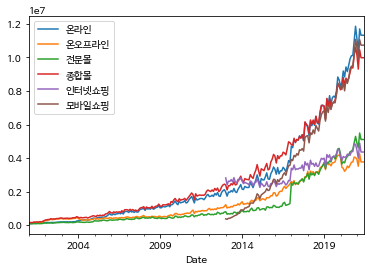

In [189]:
df3.plot(x='Date');

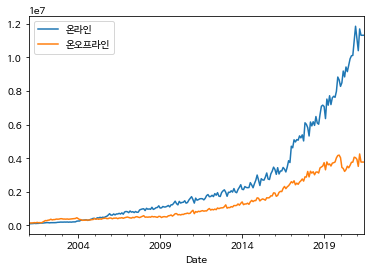

In [206]:
df4.plot(x='Date');

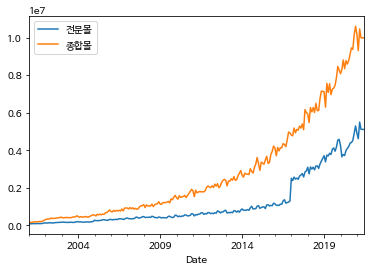

In [207]:
df5.plot(x='Date');


In [209]:
df6['Date']

,Date,인터넷쇼핑,모바일쇼핑
0,2001-01-01,NaN,NaN
1,2001-02-01,NaN,NaN
2,2001-03-01,NaN,NaN
3,2001-04-01,NaN,NaN
4,2001-05-01,NaN,NaN
...,...,...,...
241,2021-02-01,3991806.0,9923997.0
242,2021-03-01,4889892.0,11059075.0
243,2021-04-01,4360099.0,10730346.0
244,2021-05-01,4360099.0,10730346.0


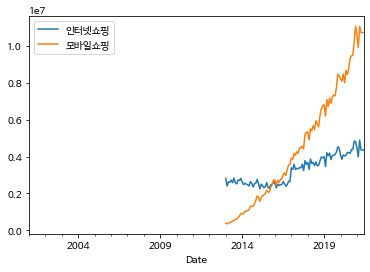

In [208]:
df6.plot(x='Date');


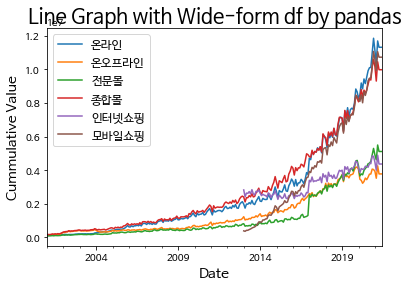

In [202]:
 # Line Graph by pandas

df3.plot.line(x='Date')
plt.title('Line Graph with Wide-form df by pandas', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cummulative Value', fontsize=14)
plt.legend(fontsize=12, loc='best')

plt.show()

In [190]:
sales = df.groupby('쇼핑몰운영형태').거래액.sum()
sales

쇼핑몰운영형태
모바일쇼핑    463350744.0
온라인      658048483.0
온오프라인    330401686.0
인터넷쇼핑    333866621.0
전문몰      293955502.0
종합몰      694494660.0
Name: 거래액, dtype: float64

In [203]:
label = ['모바일쇼핑','온라인','온오프라인','인터넷쇼핑','전문몰','종합몰']
index = np.arange(len(label))

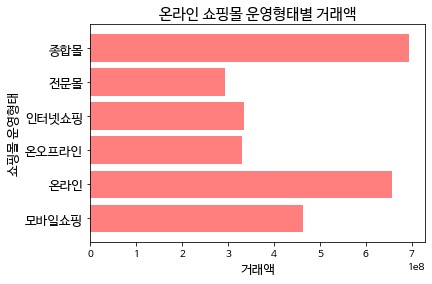

In [204]:
# Basic Bar Chart

plt.barh(index, sales,color='red',alpha=0.5)
plt.title('온라인 쇼핑몰 운영형태별 거래액', fontsize=15)
plt.ylabel('쇼핑몰 운영형태', fontsize=13)
plt.xlabel('거래액', fontsize=13)
plt.yticks(index, label, fontsize=13)
plt.show()

In [216]:
df2

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),출생아수(명),사망자수(명),혼인건수(건),이혼건수(건),Total_sales,온라인,온오프라인,PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),종합몰,전문몰,인터넷쇼핑,모바일쇼핑
0,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,56949.0,21077.0,27280.0,9270.0,228987.0,84119.0,144868.0,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,155977.0,73010.0,NaN,NaN
1,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,49939.0,19710.0,24243.0,11193.0,237018.0,96514.0,140503.0,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,158313.0,78705.0,NaN,NaN
2,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,54549.0,22168.0,28002.0,12266.0,241781.0,98403.0,143378.0,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,153303.0,88478.0,NaN,NaN
3,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,48309.0,20977.0,29065.0,10843.0,252430.0,106259.0,146171.0,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,163976.0,88455.0,NaN,NaN
4,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,46802.0,20435.0,33809.0,11685.0,279612.0,117766.0,161846.0,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,189998.0,89614.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,2021-02-01,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,21461.0,23774.0,14973.0,7759.0,13915804.0,10403719.0,3512084.0,105.91,107.000,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,9305717.0,4610087.0,3991806.0,9923997.0
242,2021-03-01,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,24054.0,26603.0,16763.0,9074.0,15948968.0,11698015.0,4250953.0,107.04,107.160,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,10455604.0,5493364.0,4889892.0,11059075.0
243,2021-04-01,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.06,107.390,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0
244,2021-05-01,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,22820.0,25087.0,15861.0,9038.0,15090445.0,11321127.0,3769318.0,108.50,107.460,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,5.4,5.9,3.8,2.1,9983229.0,5107216.0,4360099.0,10730346.0


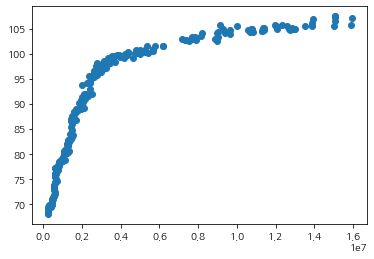

In [217]:
plt.scatter(df2['Total_sales'], df2['CPI'])

In [211]:
plt.rcParams['font.family'] = 'NanumGothic'

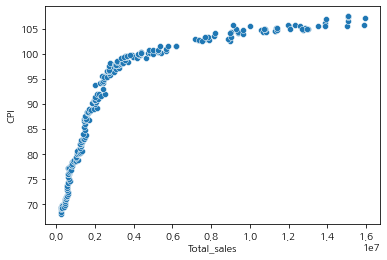

In [239]:
import seaborn as sns

sns.scatterplot(x='Total_sales', 
                        y='CPI', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태', 
                        data=df2);
plt.show();

# 소비자 물가지수가 증가할 수록, 온오프라인의 매출액도 증가하였다.

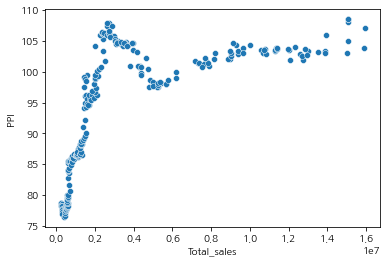

In [240]:
sns.scatterplot(x='Total_sales', 
                        y='PPI', 
                        # hue='쇼핑몰운영형태',
                        # style='쇼핑몰운영형태',        
                        data=df2)
plt.show();

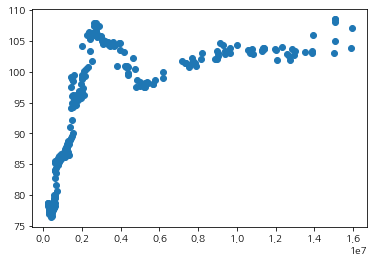

In [222]:
plt.scatter(df2['Total_sales'], df2['PPI'])

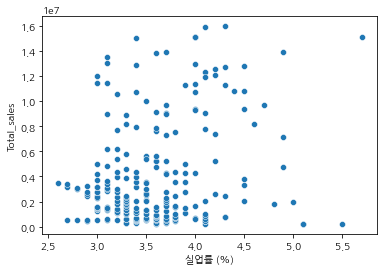

In [241]:
sns.scatterplot(x='실업률 (%)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태',
                        # style='쇼핑몰운영형태',               
                        data=df2);
plt.show();

In [242]:
# plt.scatter(df2['Total_sales'], df2['실업률 (%)'])

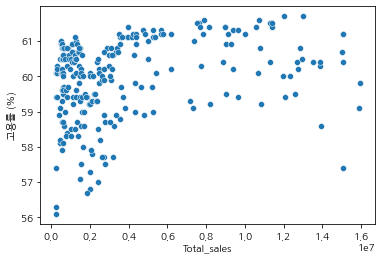

In [247]:
sns.scatterplot(y='고용률 (%)', 
                        x='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',                         
                        data=df2);
plt.show()

In [244]:
# plt.scatter(df2['Total_sales'], df2['고용률 (%)'])


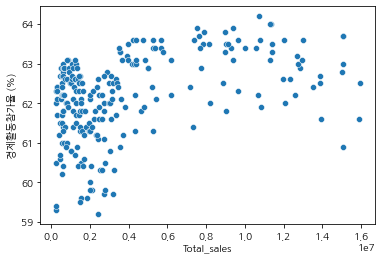

In [246]:
sns.scatterplot(y='경제활동참가율 (%)', 
                        x='Total_sales', 
                        # hue='쇼핑몰운영형태',
                        # style='쇼핑몰운영형태',                        
                        data=df2);
plt.show()

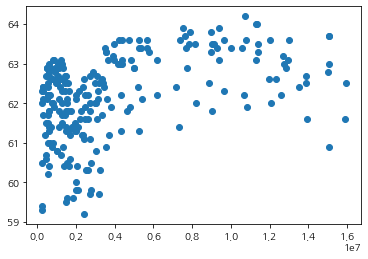

In [233]:
plt.scatter(df2['Total_sales'], df2['경제활동참가율 (%)'])

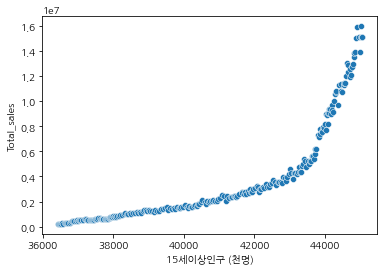

In [236]:
sns.scatterplot(x='15세이상인구 (천명)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df2);
plt.show() # 15세 이상 가구가 많아질 수록 매출액이 높아졌다. 즉 소비가는한 인구가 많아질 수록 매출액이 커지는 현상을 보여주는 것 같다.

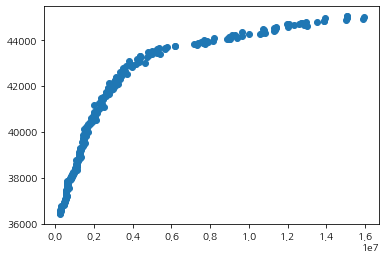

In [234]:
plt.scatter(df2['Total_sales'], df2['15세이상인구 (천명)'])

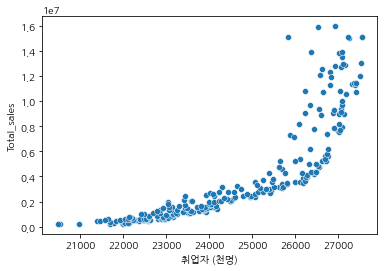

In [248]:
sns.scatterplot(x='취업자 (천명)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df2);
plt.show() # 취업자가 많아질 수록 매출액이 높아졌다. 즉 직접 돈을 벌어 소비를 할 수 있는 사람이 많아질 수록 매출액이 커지는 현상을 보여준다.

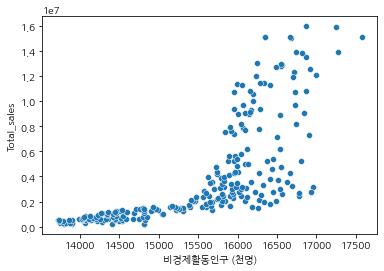

In [250]:
sns.scatterplot(x='비경제활동인구 (천명)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df2);
plt.show() # 반대로 비경제활동 인구가 많아져도 매출액이 커졌다. 이는 그저 인구가 많아질 수록 소비 액이 커지는 현상을 보여주는 것 같다. 

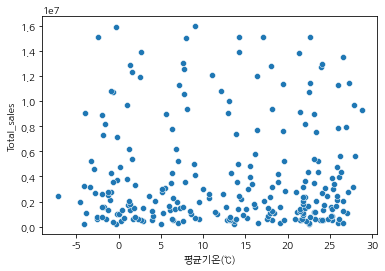

In [251]:
sns.scatterplot(x='평균기온(℃)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태',
                        # style='쇼핑몰운영형태',                     
                        data=df2);
plt.show()

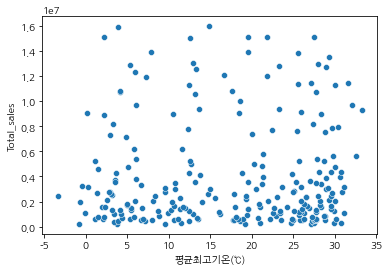

In [252]:
sns.scatterplot(x='평균최고기온(℃)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',                        
                        data=df2);
plt.show()

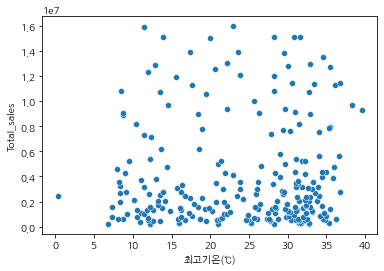

In [254]:
sns.scatterplot(x='최고기온(℃)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태',
                        # style='쇼핑몰운영형태',                      
                        data=df2);
plt.show()

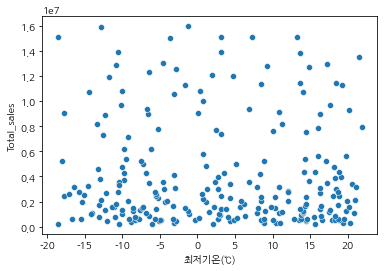

In [255]:
sns.scatterplot(x='최저기온(℃)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df2);
plt.show()

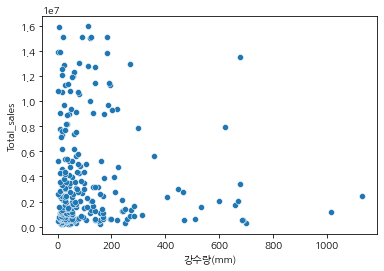

In [257]:
sns.scatterplot(x='강수량(mm)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df2);
plt.show()

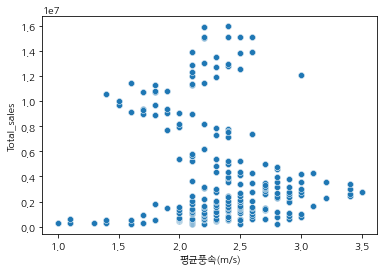

In [258]:
sns.scatterplot(x='평균풍속(m/s)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df);
plt.show()

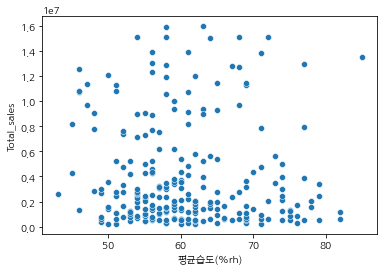

In [260]:
sns.scatterplot(x='평균습도(%rh)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df2);
plt.show()

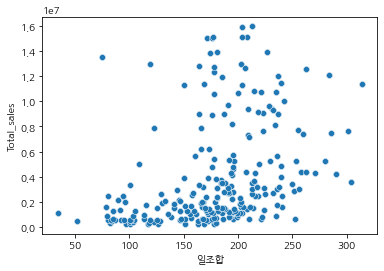

In [261]:
sns.scatterplot(x='일조합', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df);
plt.show()

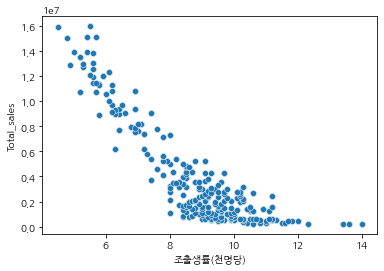

In [262]:
sns.scatterplot(x='조출생률(천명당)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df);
plt.show() # 음의 관계로 보임 - 출산률이 높아질 수록 온오프라인 매출이 낮아짐

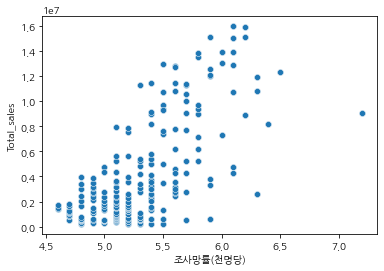

In [263]:
sns.scatterplot(x='조사망률(천명당)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df);
plt.show() # 사망률이 높아질 수록 온라인 매출액은 커지는 것으로 보인다.

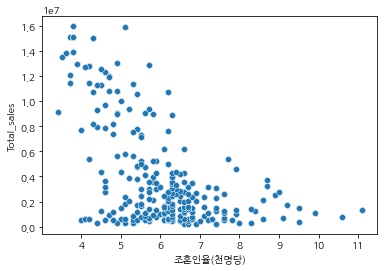

In [264]:
sns.scatterplot(x='조혼인율(천명당)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df);
plt.show() # 온라인쇼핑에선 혼인률이 높아질 수록 매출액이 낮아지는 것으로 보인다.

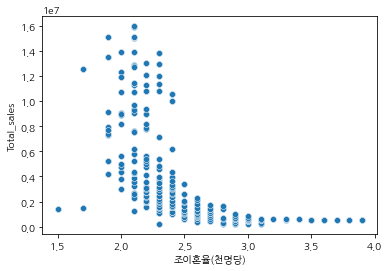

In [265]:
sns.scatterplot(x='조이혼율(천명당)', 
                        y='Total_sales', 
                        # hue='쇼핑몰운영형태', 
                        # style='쇼핑몰운영형태',             
                        data=df);
plt.show() # 

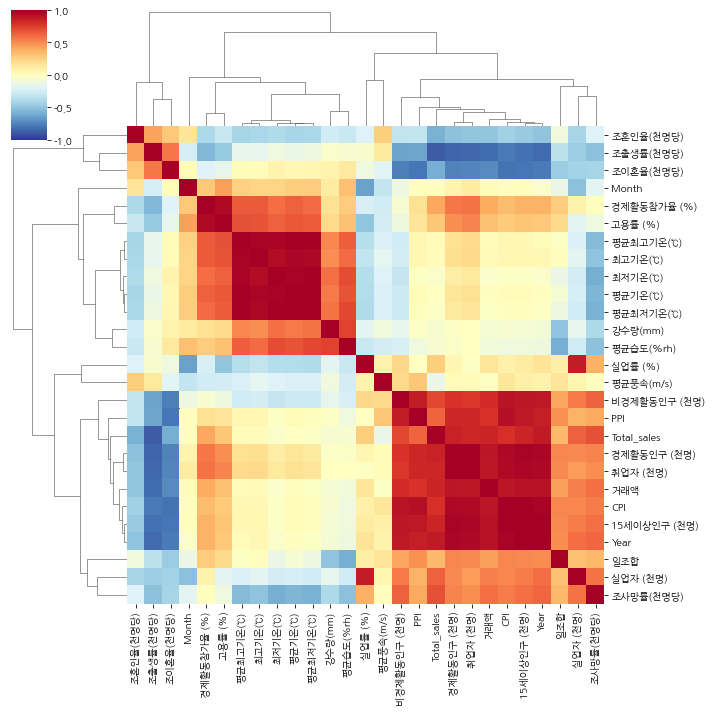

In [290]:
corr = df.corr()

sns.clustermap(corr, 
            #    annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

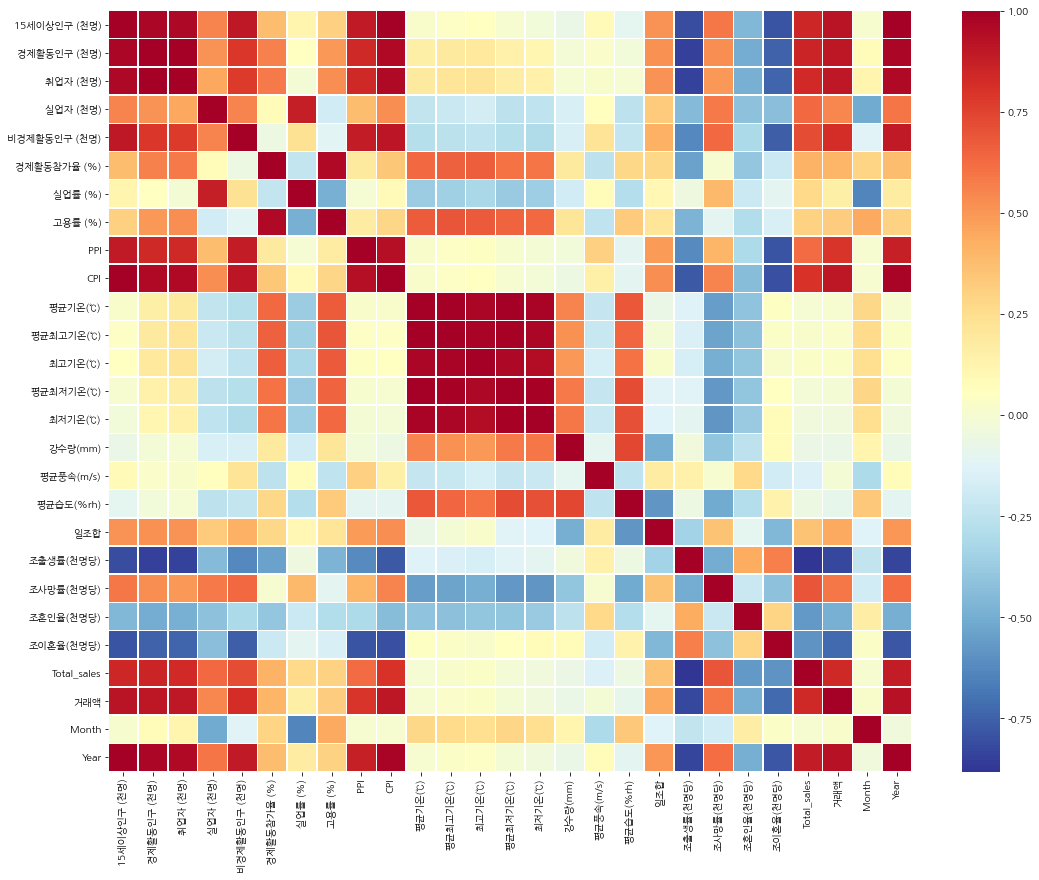

In [315]:
plt.figure(figsize=(18, 14))
sns.heatmap(corr, fmt='f', linewidths=.5, cmap='RdYlBu_r')
# plt

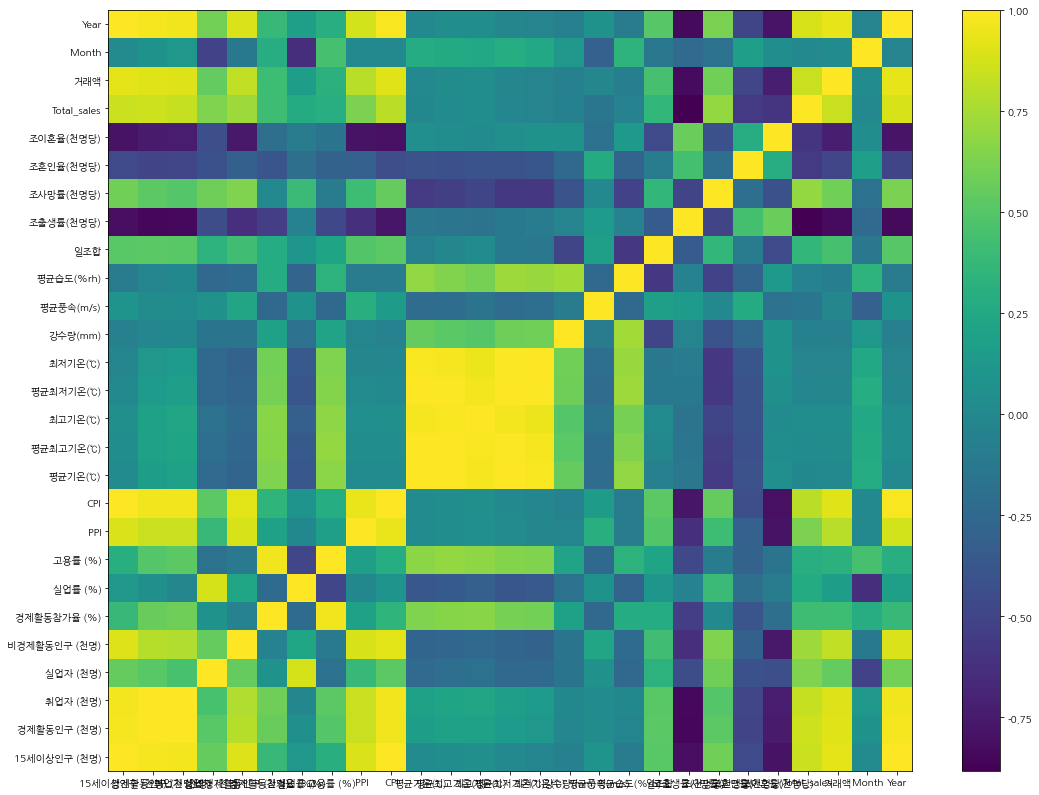

In [293]:
fig = plt.figure(figsize=(18, 14))
c = plt.pcolor(corr)
plt.yticks(np.arange(0.5, len(corr.index), 1), corr.index)
plt.xticks(np.arange(0.5, len(corr.columns), 1), corr.columns)
fig.colorbar(c)

### 타겟 시각화

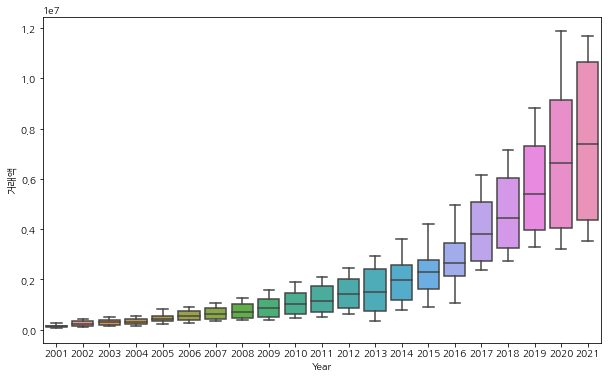

In [271]:
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.boxplot(x='Year', y="거래액", data=df, showfliers=False)

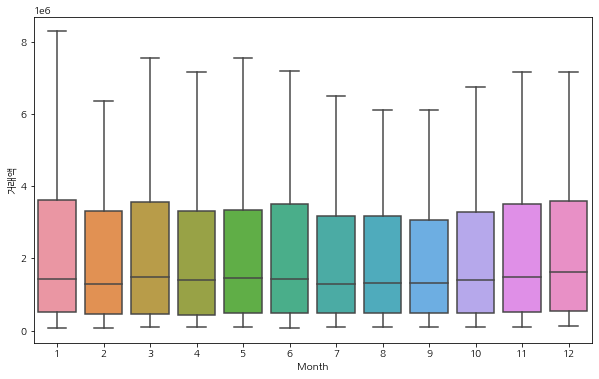

In [272]:
f, ax = plt.subplots(figsize=(10, 6))

# fig = sns.boxplot(x='Month', y="매출액", data=df, showfliers=False, hue='운영형태')
fig = sns.boxplot(x='Month', y="거래액", data=df, showfliers=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


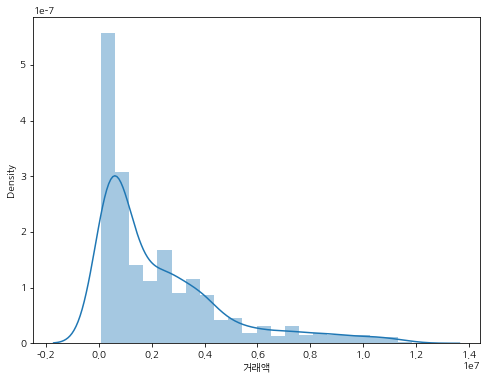

In [273]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df['거래액']) #  타겟의 분포가 right(positively) skewed로 최빈값보다 중앙값이 크고, 
# 중앙값보다 평균이 큰 데이터이다. 

In [274]:
print("Skewness: ", df['거래액'].skew()) #skewness
print("Kurtosis: ", df['거래액'].kurt()) #kurtosis

Skewness:  1.6039203418726833
Kurtosis:  2.273834672894704


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


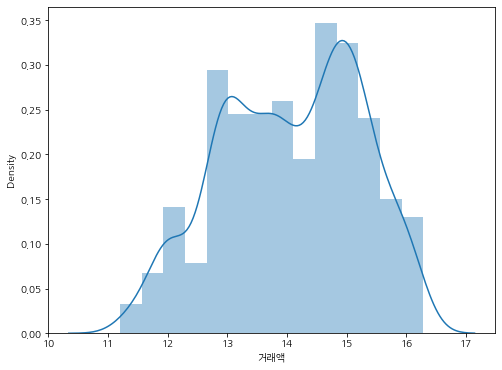

In [275]:
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(np.log1p(df['거래액'])) 
# 로그변환 후 분포가 정규분포에 가까워졌다.

In [294]:
print("Skewness: ", df['거래액'].skew()) #skewness
print("Kurtosis: ", df['거래액'].kurt()) #kurtosis

Skewness:  -0.21136085670224608
Kurtosis:  -0.8515941726207354


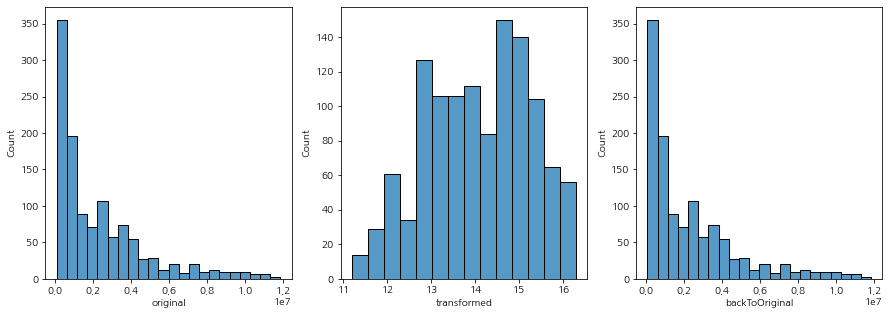

In [276]:
target = df['거래액']
plots=pd.DataFrame()
plots['original']=target
plots['transformed']=np.log1p(target)
plots['backToOriginal']=np.expm1(np.log1p(target))

fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(plots['original'], ax=ax[0]);
sns.histplot(plots['transformed'], ax=ax[1]);
sns.histplot(plots['backToOriginal'], ax=ax[2]); # 강의에서 배운대로 로그변환 후 분포가 정규분포에 가까워지고, 
# 로그변환한 데이터를 다시 지수함수에 넣으니 원 데이터가 나옴을 확인

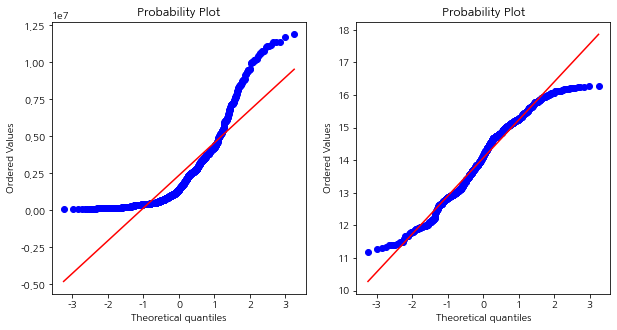

In [277]:
from scipy import stats
from scipy.stats import norm 

fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,2,1)
res = stats.probplot(df.loc[df['거래액']>0,'거래액'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df.loc[df['거래액']>0,'거래액']), plot=plt)

In [279]:
df.describe()['거래액']

count    1188.000000
mean       14.071022
std         1.178948
min        11.198365
25%        13.092549
50%        14.139272
75%        15.032945
max        16.288645
Name: 거래액, dtype: float64

In [278]:
df['거래액'] =  np.log1p(df['거래액'])

In [280]:
df.describe()['거래액']

count    1188.000000
mean       14.071022
std         1.178948
min        11.198365
25%        13.092549
50%        14.139272
75%        15.032945
max        16.288645
Name: 거래액, dtype: float64

모델링에 앞서 채우지 않았던 타겟데이터의 결측값을 뒤에 값으로 대체

In [317]:
df2[['인터넷쇼핑','모바일쇼핑']][df2['Date'] == '2013-01-01'] # 2815624.0	373409.0

,인터넷쇼핑,모바일쇼핑
144,2815624.0,373409.0


In [319]:
df[df['거래액'].isna()]

,Date,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),Total_sales,쇼핑몰운영형태,거래액,Month,Year
984,2001-01-01,36427.0,21610.0,20518.0,1092.0,14816.0,59.3,5.1,56.3,78.68,68.103,-4.1,-0.8,6.8,-7.8,-18.6,39.4,2.2,62.0,97.0,14.0,5.2,6.7,2.3,228987.0,인터넷쇼핑,NaN,1,2001
985,2001-02-01,36457.0,21652.0,20470.0,1182.0,14805.0,59.4,5.5,56.1,78.52,68.435,-0.3,3.7,12.2,-3.7,-10.4,45.7,2.1,60.0,117.0,13.6,5.4,6.6,3.1,237018.0,인터넷쇼핑,NaN,2,2001
986,2001-03-01,36487.0,22087.0,20959.0,1127.0,14401.0,60.5,5.1,57.4,78.70,69.035,5.0,9.6,21.0,0.9,-6.1,18.1,2.8,51.0,151.0,13.4,5.5,6.9,3.0,241781.0,인터넷쇼핑,NaN,3,2001
987,2001-04-01,36515.0,22622.0,21697.0,925.0,13893.0,62.0,4.1,59.4,78.65,69.301,13.6,19.2,28.2,8.7,2.1,12.3,2.5,50.0,177.8,12.3,5.3,7.4,2.8,252430.0,인터넷쇼핑,NaN,4,2001
988,2001-05-01,36549.0,22809.0,21969.0,840.0,13740.0,62.4,3.7,60.1,78.58,69.234,19.1,24.7,31.5,14.8,10.4,16.5,2.1,61.0,163.1,11.5,5.0,8.3,2.9,279612.0,인터넷쇼핑,NaN,5,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,2012-08-01,41910.0,25891.0,25121.0,770.0,16019.0,61.8,3.0,59.9,106.23,96.831,27.1,30.9,36.7,23.9,18.7,464.9,3.0,68.0,158.7,9.7,5.0,5.7,2.3,2731431.0,모바일쇼핑,NaN,8,2012
1370,2012-09-01,41937.0,26014.0,25257.0,757.0,15923.0,62.0,2.9,60.2,106.61,97.523,21.0,25.0,29.5,17.4,12.0,212.0,2.3,65.0,190.8,10.1,4.9,4.6,2.2,2748130.0,모바일쇼핑,NaN,9,2012
1371,2012-10-01,41966.0,26037.0,25315.0,722.0,15929.0,62.0,2.8,60.3,105.78,97.341,15.3,20.5,26.0,11.0,2.8,99.3,2.3,58.0,235.4,9.8,5.4,6.4,2.3,2996880.0,모바일쇼핑,NaN,10,2012
1372,2012-11-01,42005.0,25896.0,25182.0,714.0,16109.0,61.6,2.8,59.9,105.05,96.995,5.5,9.5,15.7,1.8,-3.0,67.8,2.7,57.0,181.1,9.3,5.3,7.4,2.4,3097624.0,모바일쇼핑,NaN,11,2012


In [329]:
# 시계열 데이터의 선형으로 비례하는 보간법으로 타겟값의 결측치 대체
df = df.interpolate(method='values') # [984:1373]

In [332]:
df.isna().sum().sum()

0

# 모델링

테스트셋 분리

In [334]:
train =  df[df['Date'] < '2018-01' ]
test =  df[df['Date'] >= '2018-01' ]

print(train.shape, test.shape)

(1224, 29) (252, 29)


In [335]:
X_train = train.drop(columns=['Total_sales','거래액','Date'])
X_test = test.drop(columns=['Total_sales','거래액','Date'])

target = '거래액'
y_train = train[target]
y_test = test[target]

In [336]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1224, 26) (1224,) (252, 26) (252,)


In [337]:
X_test

,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),실업자 (천명),비경제활동인구 (천명),경제활동참가율 (%),실업률 (%),고용률 (%),PPI,CPI,평균기온(℃),평균최고기온(℃),최고기온(℃),평균최저기온(℃),최저기온(℃),강수량(mm),평균풍속(m/s),평균습도(%rh),일조합,조출생률(천명당),조사망률(천명당),조혼인율(천명당),조이혼율(천명당),쇼핑몰운영형태,Month,Year
204,44073.0,27232.0,26213.0,1020.0,16840.0,61.8,3.7,59.5,102.52,103.42,-4.0,0.1,8.7,-7.3,-17.8,8.5,1.9,48.0,186.7,7.4,7.2,5.6,2.0,온라인,1,2018
205,44093.0,27348.0,26083.0,1265.0,16744.0,62.0,4.6,59.2,102.95,104.21,-1.6,3.3,10.4,-5.9,-13.4,29.6,2.2,45.0,194.2,7.0,6.4,4.8,2.0,온라인,2,2018
206,44100.0,27811.0,26555.0,1257.0,16289.0,63.1,4.5,60.2,102.91,104.10,8.1,13.6,22.1,3.8,-6.7,49.5,1.9,59.0,209.1,6.9,5.8,5.2,2.1,온라인,3,2018
207,44122.0,28029.0,26868.0,1161.0,16093.0,63.5,4.1,60.9,103.04,104.29,13.0,18.5,26.3,8.1,0.1,130.3,2.0,55.0,223.4,6.6,5.7,4.9,2.1,온라인,4,2018
208,44141.0,28184.0,27064.0,1121.0,15956.0,63.9,4.0,61.3,103.34,104.34,18.2,23.3,29.6,13.4,6.9,222.0,1.7,63.0,231.6,6.4,5.5,5.7,2.2,온라인,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471,44987.0,27718.0,26365.0,1353.0,17269.0,61.6,4.9,58.6,105.91,107.00,2.7,7.9,17.4,-2.2,-10.6,7.1,2.6,56.0,181.0,5.4,6.0,3.8,2.0,모바일쇼핑,2,2021
1472,45007.0,28138.0,26923.0,1215.0,16869.0,62.5,4.3,59.8,107.04,107.16,9.0,14.8,22.9,4.3,-1.2,110.9,2.4,63.0,213.0,5.5,6.1,3.8,2.1,모바일쇼핑,3,2021
1473,45027.0,28361.0,27214.0,1147.0,16667.0,63.0,4.0,60.4,108.06,107.39,14.2,19.5,28.2,9.5,3.1,124.1,2.6,54.0,208.6,5.4,5.9,3.8,2.1,모바일쇼핑,4,2021
1474,45049.0,28698.0,27550.0,1148.0,16351.0,63.7,4.0,61.2,108.50,107.46,17.1,21.9,30.8,12.8,7.3,183.1,2.4,68.0,203.7,5.4,5.9,3.8,2.1,모바일쇼핑,5,2021


### 명목 변수 인코딩

In [300]:
pip install category_encoders

     |████████████████████████████████| 81kB 5.1MB/s 


In [338]:
## import OneHotEncoder
from category_encoders import OneHotEncoder

## 원핫 인코딩
encoder = OneHotEncoder(use_cat_names = True)
OneHot_X_train = encoder.fit_transform(X_train)
OneHot_X_test = encoder.transform(X_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
OneHot_X_test

In [345]:

import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from category_encoders import BackwardDifferenceEncoder, PolynomialEncoder, TargetEncoder

In [347]:
# OrdinalEncoder
from category_encoders import OrdinalEncoder
Ordinal = OrdinalEncoder()
Ordinal_X_train = Ordinal.fit_transform(X_train)
Ordinal_X_test = Ordinal.transform(X_test)

### 특성 선택

In [360]:
from sklearn.feature_selection import f_regression, SelectKBest

## selctor 정의합니다.
selector = SelectKBest(score_func=f_regression) 
#--- k개수가 너무 작아지지 않도록 (중요한 변수를 제거하지 않도록) k=10으로 설정함
#---SelectKBest에는 몇가지 펑션이 있는데 score_func=f_regression 을 주로 사용함

## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(Ordinal_X_train, y_train)

## 테스트 데이터는 transform
X_test_selected = selector.transform(Ordinal_X_test)


X_train_selected.shape, X_test_selected.shape

((1224, 10), (252, 10))

In [353]:
all_names = X_train.columns

## selector.get_support()
selected_mask = selector.get_support()

## 선택된 특성들
selected_names = all_names[selected_mask]

## 선택되지 않은 특성들
unselected_names = all_names[~selected_mask] 

print('Selected names: ', selected_names)
print('Unselected names: ', unselected_names)

Selected names:  Index(['15세이상인구 (천명)', '경제활동인구 (천명)', '취업자 (천명)', '비경제활동인구 (천명)', 'PPI', 'CPI',
       '조출생률(천명당)', '조이혼율(천명당)', '쇼핑몰운영형태', 'Year'],
      dtype='object')
Unselected names:  Index(['실업자 (천명)', '경제활동참가율 (%)', '실업률 (%)', '고용률 (%)', '평균기온(℃)', '평균최고기온(℃)',
       '최고기온(℃)', '평균최저기온(℃)', '최저기온(℃)', '강수량(mm)', '평균풍속(m/s)', '평균습도(%rh)',
       '일조합', '조사망률(천명당)', '조혼인율(천명당)', 'Month'],
      dtype='object')


In [ ]:
# features를 몇 개 선택하는 것이 좋은지 알아 봅시다.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

training = []
testing = []
ks = range(1, len(X_train.columns)+1)

# 1 부터 특성 수 만큼 사용한 모델을 만들어서 MAE 값을 비교 합니다.
for k in range(1, len(X_train.columns)+ 1):
    print(f'{k} features')
    
    selector = SelectKBest(score_func=f_regression, k=k)
    
    X_train_selected = selector.fit_transform(Ordinal_X_train, y_train)
    X_test_selected = selector.transform(Ordinal_X_test)
    
    all_names = X_train.columns
    selected_mask = selector.get_support()
    selected_names = all_names[selected_mask]
    print('Selected names: ', selected_names)

    
    model = LinearRegression()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_train_selected)
    mae = mean_absolute_error(y_train, y_pred)
    training.append(mae)
    
    y_pred = model.predict(X_test_selected)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    testing.append(mae)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2} \n')

plt.plot(ks, training, label='Training Score', color='b')
plt.plot(ks, testing, label='Testing Score', color='g')
plt.ylabel("MAE ($)")
plt.xlabel("Number of Features")
plt.title('Validation Curve')
plt.legend()
plt.show()

In [373]:
# X_train =  X_train[['15세이상인구 (천명)', '경제활동인구 (천명)', '취업자 (천명)', '비경제활동인구 (천명)', 'PPI', 'CPI',
#        '조출생률(천명당)', '조이혼율(천명당)', '쇼핑몰운영형태', 'Year']]
# X_train

,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),비경제활동인구 (천명),PPI,CPI,조출생률(천명당),조이혼율(천명당),쇼핑몰운영형태,Year
0,36427.0,21610.0,20518.0,14816.0,78.68,68.103,14.0,2.3,온라인,2001
1,36457.0,21652.0,20470.0,14805.0,78.52,68.435,13.6,3.1,온라인,2001
2,36487.0,22087.0,20959.0,14401.0,78.70,69.035,13.4,3.0,온라인,2001
3,36515.0,22622.0,21697.0,13893.0,78.65,69.301,12.3,2.8,온라인,2001
4,36549.0,22809.0,21969.0,13740.0,78.58,69.234,11.5,2.9,온라인,2001
...,...,...,...,...,...,...,...,...,...,...
1429,43967.0,27903.0,26904.0,16064.0,101.35,103.370,6.9,2.2,모바일쇼핑,2017
1430,43987.0,27943.0,27011.0,16044.0,102.03,103.490,7.1,2.2,모바일쇼핑,2017
1431,44015.0,27920.0,27026.0,16095.0,102.14,103.390,6.4,1.9,모바일쇼핑,2017
1432,44040.0,27889.0,27019.0,16151.0,102.04,102.620,6.4,2.2,모바일쇼핑,2017


In [372]:
# X_test =  X_test[['15세이상인구 (천명)', '경제활동인구 (천명)', '취업자 (천명)', '비경제활동인구 (천명)', 'PPI', 'CPI',
#        '조출생률(천명당)', '조이혼율(천명당)', '쇼핑몰운영형태', 'Year']]
# X_test

,15세이상인구 (천명),경제활동인구 (천명),취업자 (천명),비경제활동인구 (천명),PPI,CPI,조출생률(천명당),조이혼율(천명당),쇼핑몰운영형태,Year
204,44073.0,27232.0,26213.0,16840.0,102.52,103.42,7.4,2.0,온라인,2018
205,44093.0,27348.0,26083.0,16744.0,102.95,104.21,7.0,2.0,온라인,2018
206,44100.0,27811.0,26555.0,16289.0,102.91,104.10,6.9,2.1,온라인,2018
207,44122.0,28029.0,26868.0,16093.0,103.04,104.29,6.6,2.1,온라인,2018
208,44141.0,28184.0,27064.0,15956.0,103.34,104.34,6.4,2.2,온라인,2018
...,...,...,...,...,...,...,...,...,...,...
1471,44987.0,27718.0,26365.0,17269.0,105.91,107.00,5.4,2.0,모바일쇼핑,2021
1472,45007.0,28138.0,26923.0,16869.0,107.04,107.16,5.5,2.1,모바일쇼핑,2021
1473,45027.0,28361.0,27214.0,16667.0,108.06,107.39,5.4,2.1,모바일쇼핑,2021
1474,45049.0,28698.0,27550.0,16351.0,108.50,107.46,5.4,2.1,모바일쇼핑,2021


모델 학습

Ridge Regression, alpha=0.001
Test MAE: $0
Test R2: -0.705


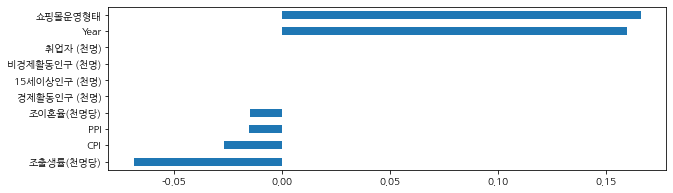

Ridge Regression, alpha=0.005
Test MAE: $0
Test R2: -1.021


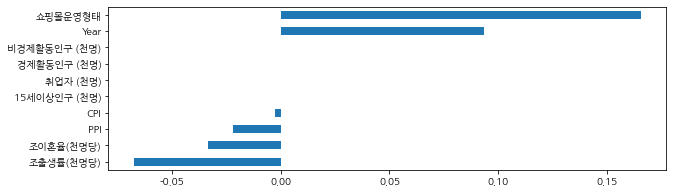

Ridge Regression, alpha=0.01
Test MAE: $0
Test R2: -1.174


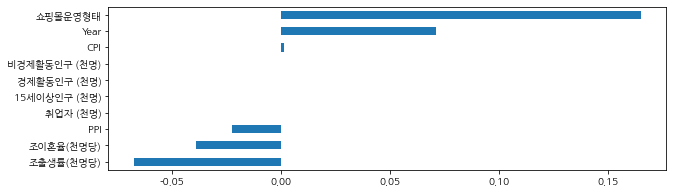

Ridge Regression, alpha=0.02
Test MAE: $0
Test R2: -1.327


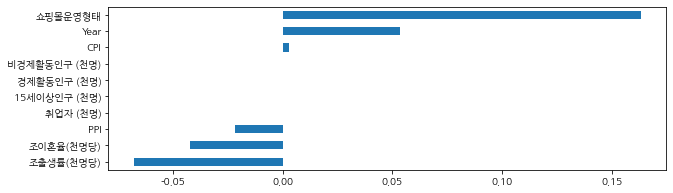

Ridge Regression, alpha=0.03
Test MAE: $0
Test R2: -1.420


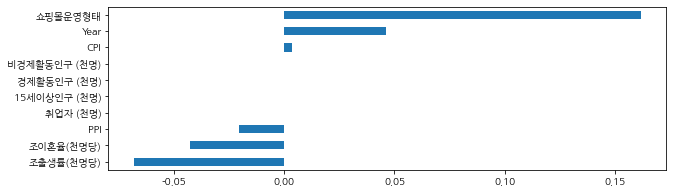

Ridge Regression, alpha=0.1
Test MAE: $0
Test R2: -1.750


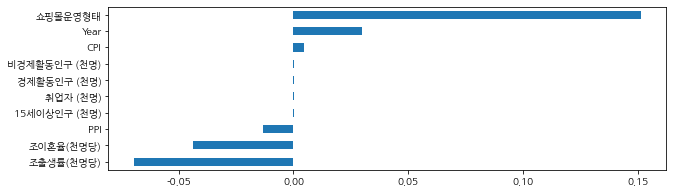

Ridge Regression, alpha=1.0
Test MAE: $1
Test R2: -3.167


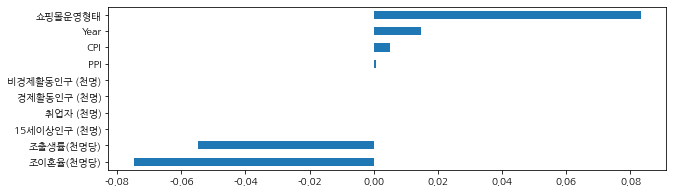

Ridge Regression, alpha=1
Test MAE: $1
Test R2: -3.167


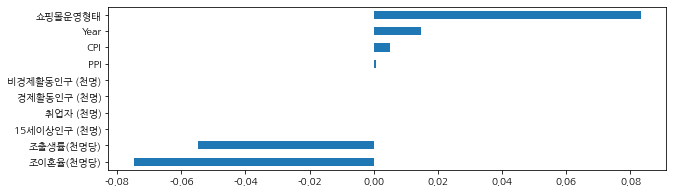

Ridge Regression, alpha=100.0
Test MAE: $2
Test R2: -14.911


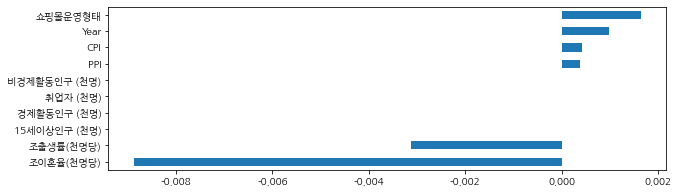

Ridge Regression, alpha=1000.0
Test MAE: $2
Test R2: -16.101


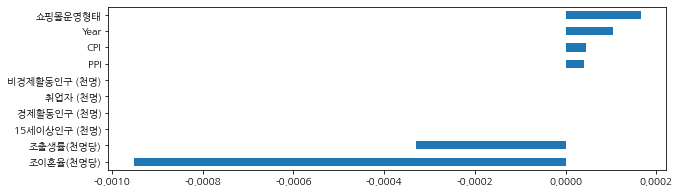

In [380]:
# 릿지 모델

from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

for alpha in [0.001, 0.005, 0.01, 0.02, 0.03, 0.1, 1.0, 1, 100.0, 1000.0]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = Ridge(alpha=alpha, normalize=True)  
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Test MAE: ${mae:,.0f}')
    print(f'Test R2: {r2:,.3f}')
    
    # plot coefficients
    coefficients = pd.Series(model.coef_, X_train.columns)
    plt.figure(figsize=(10,3))
    coefficients.sort_values().plot.barh()
    plt.show()

In [381]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def RidgeRegression(degree=3, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         Ridge(**kwargs))


for alpha in [0.001, 0.01, 0.0025, 0.05, 0.09, 0.12, 0.4, 1.0, 1, 5, 10, 100]:
        
    print(f'Ridge Regression, alpha={alpha}')

    # Ridge 모델 학습
    model = RidgeRegression(alpha=alpha, normalize=True)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # MAE for test
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Test MAE: ${mae:,.0f}')
    print(f'R2 Score: {r2:,.4f}\n')

coefs = model.named_steps["ridge"].coef_
print(f'Number of Features: {len(coefs)}')

Ridge Regression, alpha=0.001
Test MAE: $0
R2 Score: -0.3140

Ridge Regression, alpha=0.01
Test MAE: $0
R2 Score: -0.4792

Ridge Regression, alpha=0.0025
Test MAE: $0
R2 Score: -0.2355

Ridge Regression, alpha=0.05
Test MAE: $0
R2 Score: -0.8923

Ridge Regression, alpha=0.09
Test MAE: $0
R2 Score: -0.9224

Ridge Regression, alpha=0.12
Test MAE: $0
R2 Score: -0.8987

Ridge Regression, alpha=0.4
Test MAE: $0
R2 Score: -0.6392

Ridge Regression, alpha=1.0
Test MAE: $0
R2 Score: -0.6719

Ridge Regression, alpha=1
Test MAE: $0
R2 Score: -0.6719

Ridge Regression, alpha=5
Test MAE: $1
R2 Score: -1.6470

Ridge Regression, alpha=10
Test MAE: $1
R2 Score: -2.2507

Ridge Regression, alpha=100
Test MAE: $1
R2 Score: -6.8054

Number of Features: 286


In [374]:
from category_encoders import TargetEncoder 
from sklearn.preprocessing import StandardScaler
# from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(
    TargetEncoder(), # 범주형 인코딩
    StandardScaler(), # 연속형 피쳐 표준화 진행 
    LogisticRegression()
)

In [ ]:
pipe.score(X_train_selected, y_train)

In [356]:
pipe.score(X_test, y_test)

-0.03480259257142637

해당 데이터는 하나의 쇼핑몰의 매출액을 예측하는 데이터가 아니라 20개년치를 월 별로 소핑몰 거래액과 날씨, 실업률 등을 통계내어 이루어진 약 250개의 데이터를 tidy 형태로 6개의 운영형태 기준으로 6배로 늘린 데이터이다. 따라서 운영형태 컬럼을 제외한 나머지 데이터는 250개 정도가 6번 반복된 형태이고 컬럼 하나만 다른 것으로는 머신러닝에서 변별력이 없는 것으로 보여진다. 따라서 머신러닝 모델 예측은 캐글의 월마트 데이터로 추가적으로 실행하였다.  